# Lab 6: Electron Charge-to-Mass Ratio

Kollin Schultz, Dan Alfeo

# Abstract
For this Electron Charge-to-Mass Ratio Lab we ran an experiment using an electron gun, a power supply, and Helmholtz coils to produce a magnetic field. We held a constant accerlerating voltage for the electron gun while varying the applied current through the coils. The variations in current created changes in the magnetic field created by the coils and thus, changed the radii of the paths travelled by the electrons from the electron gun. We took different values for the current through the coils and recorded the radii of the path the electrons took as a result. Using this table, we are able to plot the current values to their corresponding radii and examine the resulting best fit line to find some relation to e/m.

# Introduction
In 1887 J.J. Thompson had discovered the electron by showing that cathode rays were actually negatively charged particles. In the same year he measured the specific charge (e/m) of the electron and provided the first measurement of one of the fundamental universal constants. The specific charge is defined as the charge per unit mass of the particle and it is independent of the gas used and is independent of the nature of the electrodes. We know that an electron traveling in a direction perpendicular to a uniform magnetic field will experience a Lorentz force in a direction perpendicular to both the velocity and the magnetic field. From this, we know that an electron traveling through a uniform magnetic field can be forced to make a circular path. The radius of this circular path varies for different strengths of magnetic field which results from varying the current through the Helmholtz coils. In this experiment we want to calculate the specific charge of an electron, e/m, from the radius of the circular path r for different currents through the Helmholtz coils, IH.

# Methods

To determine the charge to mass ratio of an electron, a beam of electrons was sent through a magnetic field perpendicular to its' path. A Tunable DC Constant Voltage Power Supply (BroLight) was used to generate the electron beam with a constant velocity. A current was passed through Hemholtz Coils using a Tunable DC Constant Current Power Supply (BroLight) to generate the magnetic field perpendicular to the electron beam. The voltge was kept at a constant 195 V, while the current was adjusted to produce circles of varying sizes. The radius of the electron beam circle was measured with a ruler for multiple different current values. The equipment used and general setup is pictured in figure 1. A detailed description of the equations used to determine the charge to mass ratio from our measurements is included in the results section.

![A local image](lab06_Dan_Kollin_image.jpg)

Figure 2: A visual of the lab equipment used, and the basic experimental setup.

# Results and Analysis

Our experiment measured radius of a circle formed by applying a magnetic field to a beam of electrons between Hemholtz coils. The accelerating voltage (U) was kept constant and the current in the coils (I) was adjusted between measurements. The force on an eletron in the magnetic field can be calculate using the equation: \begin{equation} F=evB \end{equation} 
Where:

e=electron charge

v= the electron velocity 

B= the strength of the magnetic field

The force from the magnetic field cause the electron to travel in a circular path so the centripetal force on the electron is defined by: \begin{equation} F=mv^2 /r \end{equation}
Where:

m= the mass of an electron

r= radius of the electron beam circle

v= the electron velocity

Setting the forces equal to each other gives: \begin{equation} eBr=mv \end{equation}

Using the equation for the velocity of an electron, \begin{equation} v^2=2eU/m \end{equation}

From these equations we find that: 
\begin{equation} e/m=2U/B^2r^2 \end{equation} 

The strength of the magnetic field can be reduced to a measurable quantity with: \begin{equation} B=(4/5)^{3/2}\mu NI/R \end{equation}

Where:

R= the radius of the Hemholtz Coils

N= the number of turns on each coil

$\mu$= permeability constant

Substituting this into the charge to mass ratio equation gives: \begin{equation} e/m=2U(5/4)^3R^2/(N\mu Ir)^2 \end{equation}

Plotting the average of our measured values for r and I in a graph as r<sup>2</sup> against 1/I<sup>2</sup> gives a slope equal to (rI)<sup>2</sup> (figure 2).

From the slope, e/m can be calculated using: 
\begin{equation} e/m=2U(5/4)^3R^2/[(N\mu)^2slope] \end{equation}

Our data resulted in a calculation of e/m=2.09x10<sup>11</sup> C/kg. With an accepted value of 1.79x10<sup>11</sup> C/kg, our experimental determination of e/m had a 16.76% error. 

421.510310528


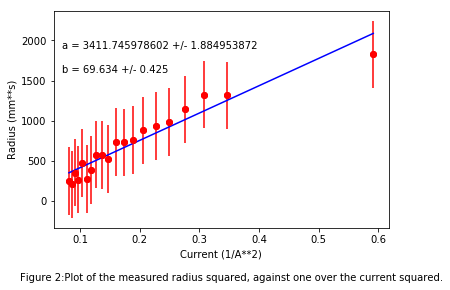

In [3]:
#Imported software with analysis and plotting functions.
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from scipy.optimize import curve_fit

data=ascii.read('lab06_data_ks_dja.csv')

#Imported data from a csv file.
i=1/(data[0][:])**2
r=(data['r'])**2

#Sorted data to fit the graph properly.
rr= [x for _,x in sorted(zip(i,r))]
ii=sorted(i)

#Determined the standard deviation of the data.
ysig=np.std(rr)
print(ysig)

#Defined function form for the trendline.
def func (x, a, b):
    return a*x + b

popt, pcov=curve_fit(func, ii, rr, absolute_sigma=ysig)

#Formatted the plot for visual representation.
plt.plot(ii, rr, 'ro')
plt.errorbar(ii, rr, yerr=ysig, fmt='ro')
plt.plot(ii, np.polyval(popt, ii), 'b-')
plt.text(0.07, 1900, r"a = {0:.9f} +/- {1:.9f}".format(popt[0], pcov[0,0]**0.5))
plt.text(0.07, 1600, r"b = {0:.3f} +/- {1:.3f}".format(popt[1], pcov[1,1]**0.5))
plt.text(0, -1000, 'Figure 2:Plot of the measured radius squared, against one over the current squared.')
plt.ylabel('Radius (mm**s)')
plt.xlabel('Current (1/A**2)')
plt.show()

In [87]:
#Imported software with analysis and plotting functions.
import numpy as np

#Defined Variables for use in formula
R=158 #mm
N=130 #turns per coil
U=195 #V
slope=popt[0] #mm**2*A**2
N=130 #turns per coil
mu=(4*np.pi*10**-7) 
k=(5/4)**3

#Calculated e/m from measured values.
e_m=(2*U*k*(R**2))/(((N*mu)**2)*slope)

print(e_m)


208845777486.0


## Conclusion

Our determination of the charge to mass ratio of an electron resulted in a value of 2.09x10<sup>11</sup> C/kg. This is a 16.76% error from the accepted value of 1.79x10<sup>11</sup> C/kg. The inaccuracy of our calculation is likely due to the high amount of uncertainty in our measuring. The standard deviation on the radius measurement was 421.5 mm<sup>2</sup>. With such a high uncertainty on the radius measurements, it is unlikely that uncertainty from the equipment used significantly contributed to the error. To lower the measurement uncertainty, future attempts could measure the diameter rather than the radius of the circle, because determining the center of each circle was difficult with the experimental setup used.

# Acknowledgements



We would like to thank Dr. Ribaudo for his assistance with the curve fitting to our data.